<a href="https://colab.research.google.com/github/Brazza32/ADS2002-Catheter/blob/Noha/Edge_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Converting image into an array

In [37]:
from PIL import Image
from numpy import asarray

img = Image.open("/content/drive/MyDrive/Colab Notebooks/1.2.826.0.1.3680043.8.498.99895665610300794863829614604661608444.jpg")
numpydata = asarray(img)

print(numpydata)

[[  1   3   6 ...   6   3   2]
 [  4   6   9 ...   9   6   5]
 [  8  10  13 ...  12   9   8]
 ...
 [ 11  13  16 ... 131 104  96]
 [  7   9  12 ...  94  69  63]
 [  4   6   9 ...  75  52  47]]


## Applying Gaussian smoothing to decrease noise

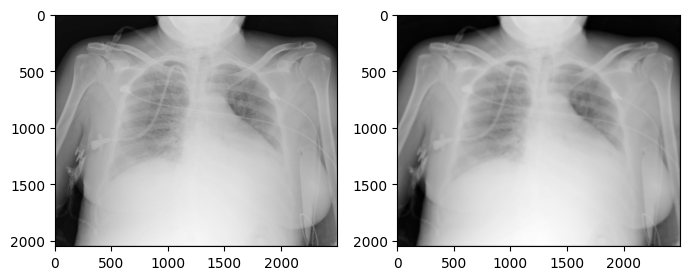

In [53]:
from scipy.ndimage import gaussian_filter
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

fig = plt.figure()
a = gaussian_filter(numpydata, sigma = 5)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
blurred = ax1.imshow(numpydata)
ax2.imshow(a)

smoothing the image reduces noise but also makes the image blurrier.

## Using edge detection to detect catheters

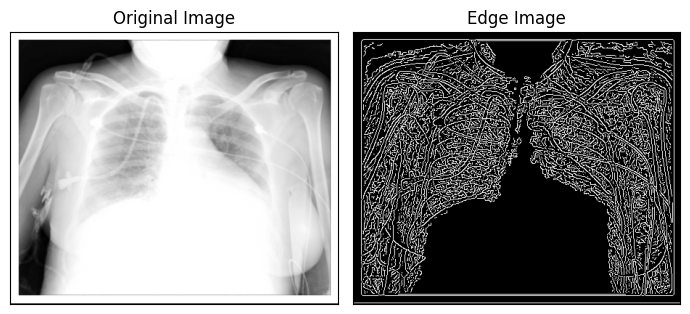

In [91]:
image_path ="/content/drive/MyDrive/Colab Notebooks/testcatheter.png"

img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
threshold1 = 4
threshold2 = 8
edges = cv.Canny(img,threshold1,threshold2)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

updating the threshold to increase edge detection sensitivity produces many edges


##Increasing image sharpness (just a test)

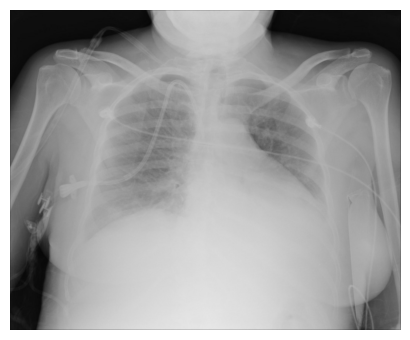

Blurry Image


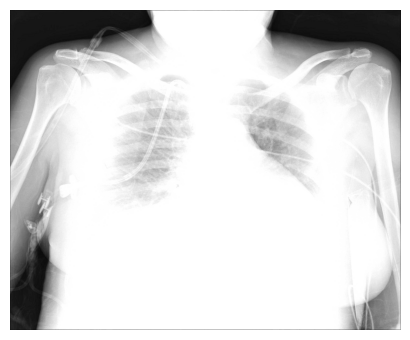

Sharpened Image


In [81]:
original= cv.imread('/content/drive/MyDrive/Colab Notebooks/1.2.826.0.1.3680043.8.498.99895665610300794863829614604661608444.jpg', cv.IMREAD_UNCHANGED)
plt.imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
plt.axis('off')  # Remove axis labels
plt.show()
print("Blurry Image")

# create a sharpening kernel
sharpen_filter=np.array([[-1,-1,-1],
                 [-1,9.6,-1],
                [-1,-1,-1]])
# applying kernels to the input image to get the sharpened image

sharp_image=cv.filter2D(original,-1,sharpen_filter)
plt.imshow(cv.cvtColor(sharp_image, cv.COLOR_BGR2RGB))
plt.axis('off')  # Remove axis labels
plt.show()
print("Sharpened Image")

Here we see that sharpening the image increases contrast, however also drastically increases noise (becomes almost white).
This image would then be useless when trying to detect any catheters as so much is in the way.

# below are attempts to isolate the catheters only (not much luck)

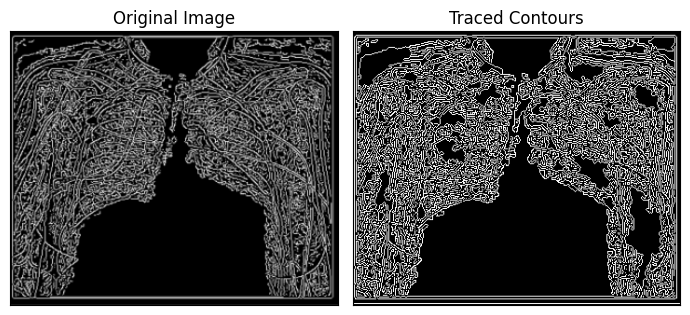

In [98]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/Colab Notebooks/catheteredge.png"
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read, check with os.path.exists()"

# Set the Canny edge detection thresholds
threshold1 = 4
threshold2 = 8

# Apply Canny edge detection
edges = cv.Canny(img, threshold1, threshold2)

# Find and trace contours
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Create a blank image for the contour visualization
contour_img = np.zeros_like(img)

# Draw the detected contours on the blank image
cv.drawContours(contour_img, contours, -1, 255, 1)

# Plot the original image and the traced contours
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(contour_img, cmap='gray')
plt.title('Traced Contours'), plt.xticks([]), plt.yticks([])

plt.show()

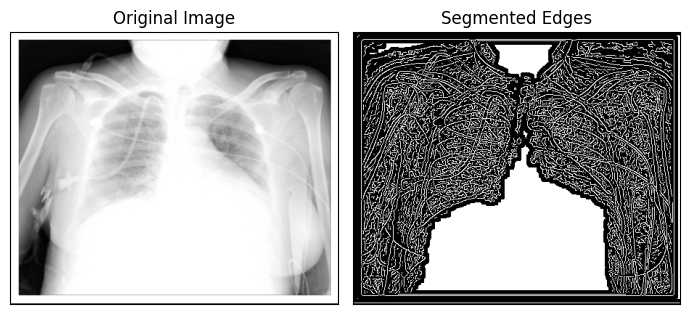

In [99]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/Colab Notebooks/testcatheter.png"
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read, check with os.path.exists()"

# Set the Canny edge detection thresholds
threshold1 = 4
threshold2 = 8

# Apply Canny edge detection
edges = cv.Canny(img, threshold1, threshold2)

# Apply adaptive thresholding to the edge image
adaptive_thresh = cv.adaptiveThreshold(edges, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)

# Plot the original image and the segmented edge image
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Segmented Edges'), plt.xticks([]), plt.yticks([])

plt.show()

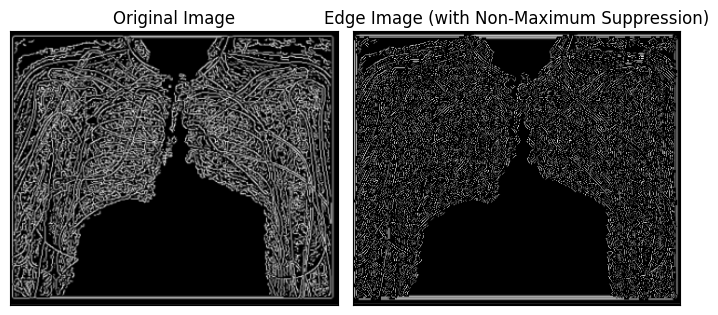

In [102]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = "/content/drive/MyDrive/Colab Notebooks/catheteredge.png"
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
assert img is not None, "File could not be read, check with os.path.exists()"

# Set the Canny edge detection thresholds
threshold1 = 4
threshold2 = 8

# Apply Canny edge detection
edges = cv.Canny(img, threshold1, threshold2)

# Apply non-maximum suppression
def non_maximum_suppression(image, angles):
    suppressed = np.zeros_like(image)
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            angle = angles[i, j]
            if (0 <= angle < 45) or (135 <= angle <= 180):
                neighbors = [image[i - 1, j], image[i + 1, j]]
            elif (45 <= angle < 90) or (225 <= angle <= 270):
                neighbors = [image[i - 1, j - 1], image[i + 1, j + 1]]
            elif (90 <= angle < 135) or (270 <= angle <= 315):
                neighbors = [image[i, j - 1], image[i, j + 1]]
            else:  # angle is exactly 0 or 180 (horizontal)
                neighbors = [image[i, j - 1], image[i, j + 1]]
            if image[i, j] >= max(neighbors):
                suppressed[i, j] = image[i, j]
    return suppressed

# Calculate gradient magnitude and angle
gradient_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=3)
gradient_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=3)
gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
gradient_angle = np.arctan2(gradient_y, gradient_x) * (180 / np.pi)  # Convert to degrees

# Apply non-maximum suppression to the gradient magnitude
edges_suppressed = non_maximum_suppression(gradient_magnitude, gradient_angle)

# Plot the original image and the edge image with non-maximum suppression
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(edges_suppressed, cmap='gray')
plt.title('Edge Image (with Non-Maximum Suppression)'), plt.xticks([]), plt.yticks([])

plt.show()
